### Creator Lifecycle & Monetization Archetypes: Strategic Segmentation for Short-Video Platforms

#### Executive Summary
In high-growth social media ecosystems like ByteDance (TikTok/Douyin), creator retention and monetization are the primary drivers of platform health. This project utilizes unsupervised machine learning to segment 2,600 creators based on their Engagement Index and Monetization Maturity. By identifying distinct behavioral archetypes, we can transition from a "one-size-fits-all" creator support model to a targeted, data-driven strategy that maximizes both content volume and ad-revenue potential.

#### 1. The Business Problem
Context: The platform has millions of creators, but not all provide the same value. Some drive "views" (engagement), while others drive "transactions" (monetization/spending).

__The Challenge:__ How can we algorithmically categorize these creators to:
1. Identify "Rising Stars" before they churn?
2. Optimize the distribution of creator-support resources?
3. Target the right creators for new feature rollouts (e.g., TikTok Shop)?

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Setting visual style for a professional report
plt.style.use('fivethirtyeight')
%matplotlib inline

# Load the raw dataset
df = pd.read_csv('Instagram visits clustering.csv')

# Business Mapping: Renaming for platform context
df.rename(columns={
    'Instagram visit score': 'Engagement_Index',
    'Spending_rank(0 to 100)': 'Monetization_Maturity'
}, inplace=True)

print(f"Dataset loaded with {df.shape[0]} creator profiles.")
df.head()

Dataset loaded with 2600 creator profiles.


,User ID,Engagement_Index,Monetization_Maturity
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


#### 2. Exploratory Data Analysis (EDA)
Before clustering, we must understand the distribution of our features. In social media data, engagement is often skewed.

Probability Distribution of Key Features:
Engagement_Index        -0.405783
Monetization_Maturity    0.549969
dtype: float64


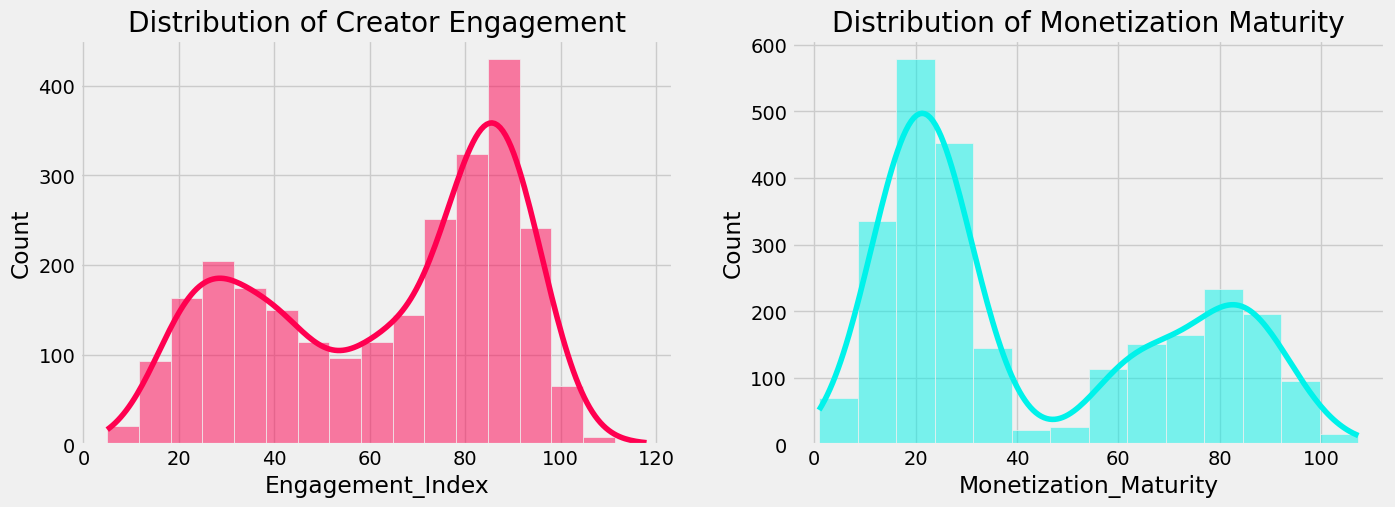

In [10]:
# Calculate and print skewness of key features within the dataset
skewness_results = df[['Engagement_Index', 'Monetization_Maturity']].skew(axis=0, skipna=True)
print('Probability Distribution of Key Features:')
print(skewness_results)
      

# Show QQplots to better understand skewness visually
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['Engagement_Index'], kde=True, ax=ax[0], color='#FF0050')
ax[0].set_title('Distribution of Creator Engagement')

sns.histplot(df['Monetization_Maturity'], kde=True, ax=ax[1], color='#00F2EA')
ax[1].set_title('Distribution of Monetization Maturity')

plt.show()

__Observation:__

Before applying clustering algorithms, we examined the probability distribution of our two key features: Engagement_Index and Monetization_Maturity.
- __Engagement_Index Skewness:__ -0.41 (Moderately Left-Skewed)
- __Monetization_Maturity Skewness:__ +0.55 (Moderately Right-Skewed)

#### 3. Methodology: K-Means Clustering
To ensure the model is mathematically sound, we use:
1. __Feature Scaling:__ K-Means relies on Euclidean distance; therefore, we must standardize features to a mean of 0 and variance of 1.
2. __The Elbow Method:__ To find the point where adding another cluster doesn't significantly improve the within-cluster sum of squares (WCSS).
3. __Silhouette Analysis:__ To measure how similar a creator is to their own cluster compared to others.

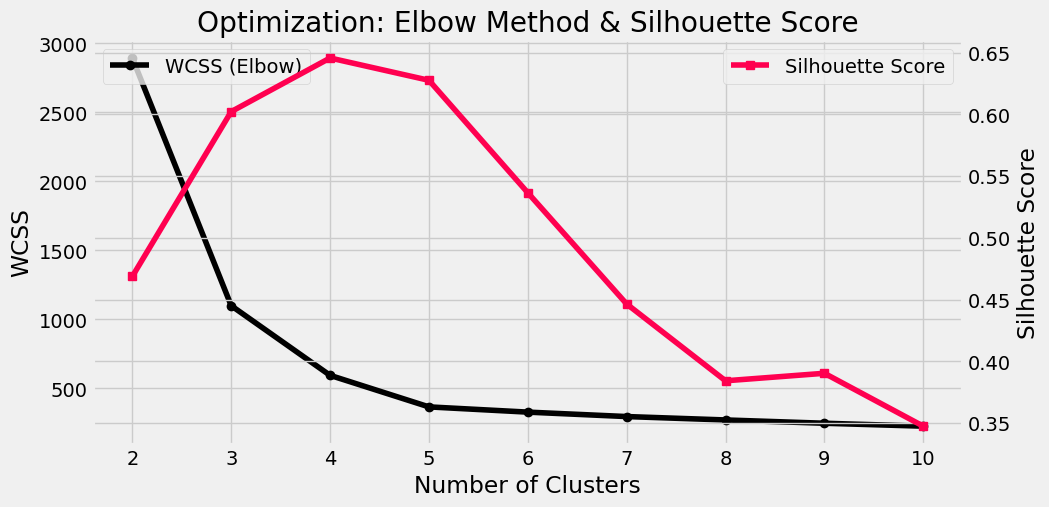

In [11]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Engagement_Index', 'Monetization_Maturity']])

# Finding optimal k
wcss = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

# Plotting the selection criteria

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(k_range, wcss, color='black', marker='o', label='WCSS (Elbow)')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(k_range, sil_scores, color='#FF0050', marker='s', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score')
ax2.legend(loc='upper right')

plt.title('Optimization: Elbow Method & Silhouette Score')

plt.show()


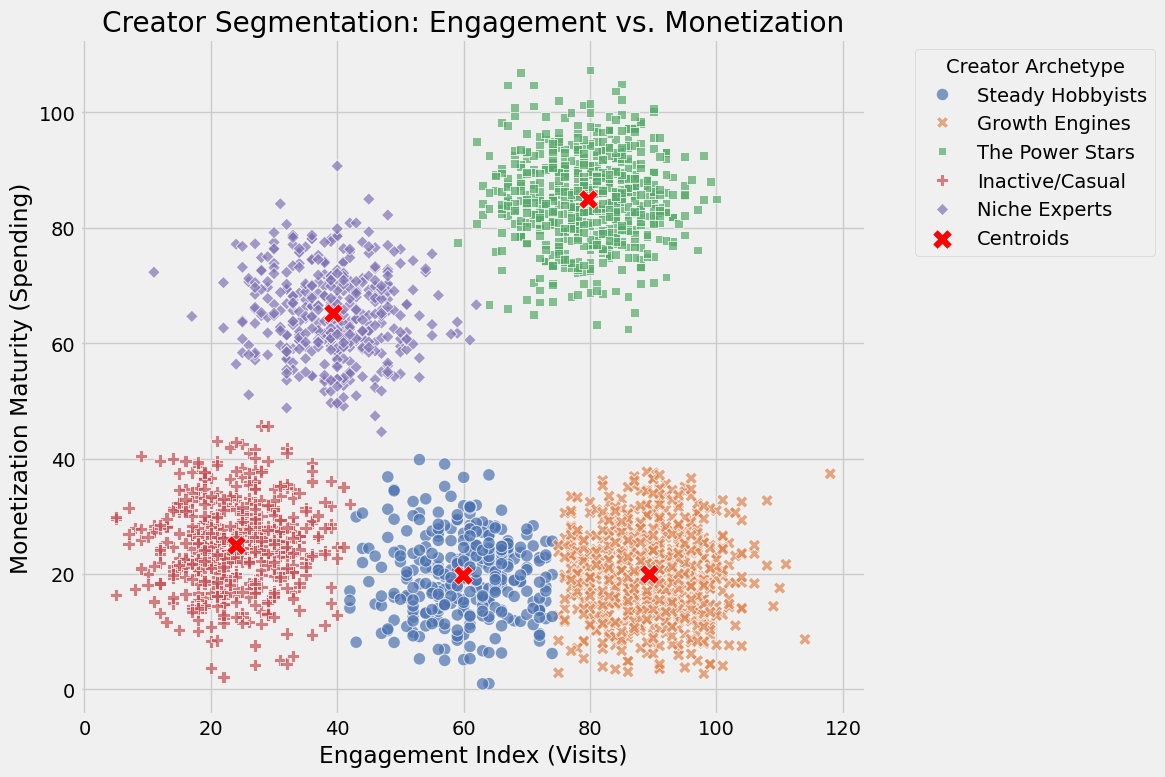

In [12]:
# Finalizing k=5 based on the clear silhouette peak and business interpretability
final_km = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = final_km.fit_predict(X_scaled)

# Create the mapping dictionary
cluster_labels = {
    2: 'The Power Stars',
    4: 'Growth Engines',
    1: 'Niche Experts',
    0: 'Steady Hobbyists',
    3: 'Inactive/Casual'
}

# Apply labels
df['Archetype'] = df['Cluster'].map(cluster_labels)

# Plot with meaningful labels
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Engagement_Index', y='Monetization_Maturity', 
                hue='Archetype', style='Archetype', palette='deep', s=80, alpha=0.7)

# Plot Centroids
centers = scaler.inverse_transform(final_km.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', edgecolors='white', label='Centroids')

plt.title('Creator Segmentation: Engagement vs. Monetization')
plt.xlabel('Engagement Index (Visits)')
plt.ylabel('Monetization Maturity (Spending)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Creator Archetype')
plt.tight_layout()
plt.show()


#### 4. Strategic Insights & Archetype Profiling
Now we translate the clusters into actionable market research personas.

| Archetype | Characteristics | Strategic Action |
| :--- | :--- | :--- |
| **The Power Stars** | High Engagement / High Monetization | **VIP Support:** Assign dedicated talent managers; prioritize for global campaigns. |
| **Growth Engines** | High Engagement / Low Monetization | **Monetization Training:** These creators drive traffic but lack "Shop" skills. Offer TikTok Shop onboarding. |
| **Niche Experts** | Low Engagement / High Monetization | **Conversion Leaders:** Ideal for high-intent affiliate marketing where "reach" matters less than "trust." |
| **Steady Hobbyists** | Mid-Tier Metrics | **Engagement Loops:** Use daily challenges and "trending audio" notifications to increase their activity. |
| **Inactive/Casual** | Low Engagement / Low Monetization | **Automated Nurture:** Low priority; use automated email tips for content creation basics. |

####  5. Conclusion & Next Steps
__Key Findings:__ The model successfully moved beyond raw metrics to identify five distinct behaviors. Notably, the "Growth Engines" represent the largest opportunity for revenue growth, as they have the audience but haven't matured their monetization.